Simple Linear Regression Model


In [58]:
##import the essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [4]:
##Reading the dataset using pandas, should ideally use other user defined function
data = pd.read_csv('Salary_data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
##Splitting the target and feature variables
X = data.iloc[:,0]
y = data.iloc[:,1]

In [9]:
print(X)

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64


In [10]:
print(y)

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64


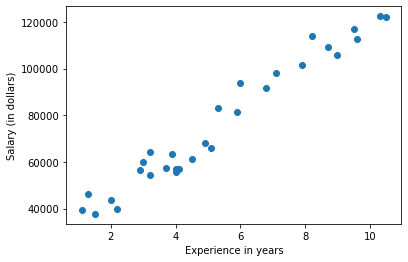

In [15]:
##Scatter plot of dependent and independent variable
plt.scatter(X,y)
plt.xlabel('Experience in years')
plt.ylabel('Salary (in dollars)')
plt.show()

In [23]:
## Mean function

def mean(var):
    return sum(var)/len(var)

print('Mean of independent Variable',mean(X))
print('Mean of Dependent Variable',mean(y))

X_hat = mean(X)
y_hat = mean(y)



Mean of independent Variable 5.3133333333333335
Mean of Dependent Variable 76003.0


In [40]:
##Variance function

def vari(values, mean):
    ax = 0.0
    for i in range(len(values)):
         ax += ((values[i]-mean)*(values[i]-mean))
    return ax

print('Variance of Independent Variable',vari(X,X_hat)/len(X))
print('Variance of Dependent Variable',vari(y,y_hat)/len(y))

np.var(y)


Variance of Independent Variable 7.785155555555554
Variance of Dependent Variable 726499261.7333333


In [39]:
##Covariance function

def covari(values_X, mean_X,values_y, mean_y):
    cv = 0.0
    for i in range(len(values_X)):
         cv += ((values_X[i]-mean_X)*(values_y[i]-mean_y))
    return cv

print('Co-Variance of Variables',covari(X,X_hat,y,y_hat)/len(X))


Co-Variance of Variables 73569.42666666667


Equation of 1-D line

y = m*x + c

    ## Slope
    m = cov(x,y)/var(x)

    ## Intercept
    c = (y^) - m*(x^)

where, y^ = mean of dependent variable
        x^ = mean of independent variable



In [54]:
##Linear Regression model Function
def linear_reg(indep,dep):
    mean_indep = mean(indep)
    mean_dep = mean(dep)
    cov = covari(indep,mean_indep,dep,mean_dep)
    var_model = vari(indep,mean_indep)

    m = cov/var_model
    c = (mean_dep - (cov/var_model)*(mean_indep))
    return [m,c]

In [55]:
##Slope and Intercept of the training dataset
slope, intercept = linear_reg(X,y)
print('The slope : ',slope)
print('The intercept : ',intercept)

The slope :  9449.962321455077
The intercept :  25792.20019866869


In [69]:
##Linear Regression prediction function -- Testing on a randomly generated set of numbers
def linear_pred(test_X,train_X,train_y):
    pred = list()
    slope_model, intercept_model = linear_reg(train_X,train_y)
    for i in range(len(test_X)):
        a = ((slope_model)*test_X[i] + intercept_model)
        pred.append(a)
    return pred

x = np.random.uniform(low=0.5, high=13.3, size=(50,))

pred_random = linear_pred(x,X,y)

print(pred_random)


[46982.33252898563, 49488.63109785391, 41070.17258318652, 84425.90978814254, 75449.01991400204, 123274.73500595929, 62175.53164022924, 115365.84330232252, 35538.656505460516, 51222.10279158273, 40661.535930402184, 85754.4644451176, 40429.14392908996, 81664.6660745465, 84594.82686335457, 109343.4233761692, 139622.7886524944, 110746.42420950267, 146281.5293036479, 52898.58434590967, 104460.80376923637, 74458.01559949666, 126315.70128953597, 95859.22225971142, 62473.76635899261, 88219.86753414858, 149754.45005278033, 102996.67745232608, 38818.76524090416, 100748.98922734181, 35372.094855530864, 115441.93858902121, 69142.19836491212, 62130.293204286274, 61590.67083139812, 61863.57564669392, 48134.2057882373, 81703.28477797168, 68460.0810612457, 147034.44211868232, 56618.29997787304, 149219.38025061964, 81101.05864715888, 136807.5091454176, 65380.2434586444, 97517.66161438465, 92924.60039397352, 43023.127086236105, 131180.42165876183, 101382.2678561297]


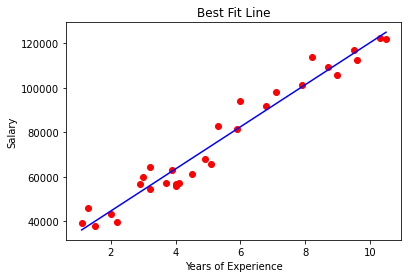

In [72]:
## Best fit line based on train data -- with train points indicated in red
plt.scatter(X, y, color = 'red')
plt.plot(X, linear_pred(X,X,y), color = 'blue')
plt.title('Best Fit Line')
plt.xlabel('Experience in years')
plt.ylabel('Salary in dollars')
plt.show()

In [ ]:
# ##Evaluation Metrics
# def r2(y_,y):
#  sst = np.sum((y-y.mean())**2)
#  ssr = np.sum((y_-y)**2)
#  r2 = 1-(ssr/sst)
#  return(r2)
# #----------------
# r2(y_,y_test)